In [1]:
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
import pickle


from sklearn import datasets, svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Introduction to Linear Machine Learning

![](figs/big_hammer.jpeg)


## What is Machine Learning?


Everyone write down their definition


- “Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia


- “Machine learning is based on algorithms that can learn from data without relying on rules-based programming.”- McKinsey & Co.


- “The field of Machine Learning seeks to answer the question “How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?” – Carnegie Mellon University


- Machine learning research is part of research on artificial intelligence, seeking to provide knowledge to computers through data, observations and interactions with the world. That acquired knowledge allows computers to correctly generalize to new settings.


- “Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.”


## Mathematical Definition


The problem is to take _n-samples_ of data with _m-features_ and try to predict a property of unknown data


- Generally, each sample has multiple attributes commonly called **features**


- When using linear machine learning models choice of features is essential


## Machine Learning Basic Concepts


### Representations

- A set of classifiers or the language that a computer understands
- How the model connects data to the objective


**The way humans make inferences from data is different than of machines**


Examples:

- K-nearest neighbors
- support vector machines
- decision trees
- neural networks
- ...


### Evaluation

- how the model determines its success at completing an objective


**The ways humans and computers quantify success at **an objective **are** very different\*\*\*\*


Examples:

- accuracy/error rate
- squared error
- likelihood
- KL divergence (entropy between two distributions)
- ...

**Note for Engineers - The concepts of statistical thermodynamics are very relevant to machine learning dynamics**


## Optimization

- the model search method
- how the model improves itself
- how the model values exploration vs. exploitation


**The way that humans and computers optimize and solve problems is very different**


Examples:
Combinatorial optimization

- random search
- greedy search
  Continuous optimization
- gradient descent
- quasi-Newton method


![figure](figs/Componets_of_a_learning_algorithm.png)


In [2]:
IFrame(src='http://www.r2d3.us/visual-intro-to-machine-learning-part-1/', width=1000, height=800)

## How do we get machines to learn?


- Choose the best learning algorithm


Other things that matter

- Collect and collate meaningful data


- Provide the data to the machine in a form that emphasizes the learning objective


\*\*Humans and machines are great collaborators:

- Humans are great at deducing conclusions from a few examples based on abstract connections between observations


- Machines are great at searching large high-dimensional information for statistical trends\*\*


## Challenges and Limitations


### Overfitting


![figure](figs/Explaining_Overfitting.png)


This might be a comfy bed for you, but I don't know if your friend would like to sleep on it ☺️


- It is possible to get perfect accuracy on a test set but cannot conduct inference on a new problem
- The model is not **generalizable**


A model can classify types of apples but show it an orange and it is useless


### Overfitting Example with Polynomials


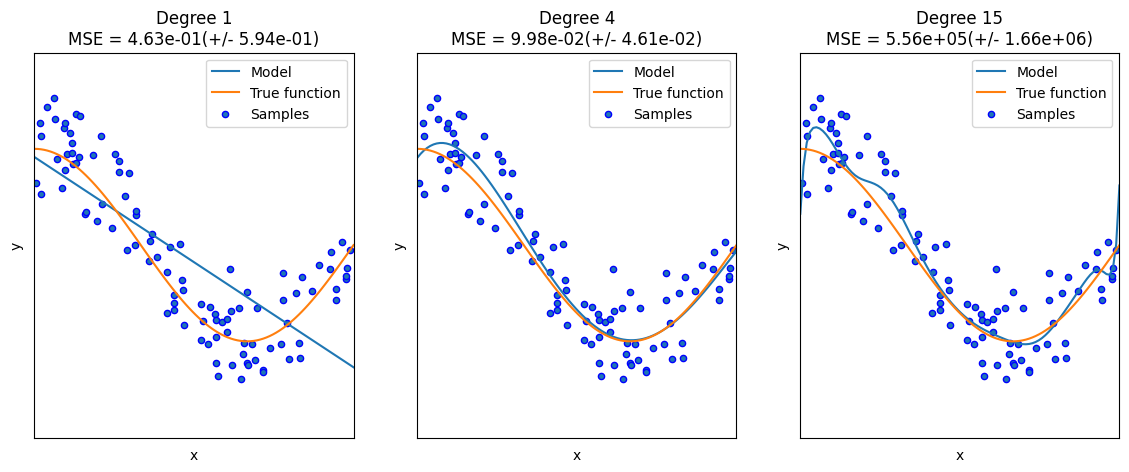

In [3]:
# Defines the function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# sets a random seed for consistent plotting
np.random.seed(0)

# sets the number of samples
n_samples = 100

# Sets the range in degrees
degrees = [1, 4, 15]

# adds some noise to the data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

# does the plotting
plt.figure(figsize=(14, 5))

# Loops around the number of degrees selected
for i in range(len(degrees)):

    # makes the subplot
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # creates the polynomial
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

    # Least squares linear regression
    linear_regression = LinearRegression()

    # establishes a fitting pipeline
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # does the fit
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    # Defines a linear vector
    X_test = np.linspace(0, 1, 100)

    # plots the real model
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")

    # plots the generated data
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    # sets the axes format
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

## Categories of Machine Learning


### Supervised Learning


- The data that we have comes with examples that have ground truths for what we want to predict


In [4]:
IFrame(src='https://scikit-learn.org/stable/supervised_learning.html#supervised-learning', width=1000, height=1000)

### Classification

- Samples belong to two or more classes ... we want to learn from labeled data how to predict the class of an unlabeled example.
  - Example: Read handwritten digits from images


### Regression

- The desired output consists of one or more continuous variables.
  - Example: Predict the yield of product for a given operating condition


## Unsupervised Learning

- Training data consists of input values without any target values
  Goals are to:


- **Cluster** - Cluster data into groups


- **Dimensionality Reduction** - Reduce the dimensionality of data


- **Generation** - Try to generate new samples that belong to the same distribution


In [5]:
IFrame(src='https://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning', width=1000, height=1000)

## Designing a Training and Validation

### Training and Testing Sets


- When conducting machine learning we want to train the model with one **training dataset** and then apply it to new never-before-seen **testing data**
- It is quite common to have a **validation dataset** that you can validate your model independent of your in-training metrics


## Example Workflow


### Loading Example Datasets

- `scikit-learn` has a handful of datasets for testing purposes
- It is always good to benchmark models on standard data sets


In [6]:
# imports iris dataset
iris = datasets.load_iris()

# imports digits dataset
digits = datasets.load_digits()

- Each of these datasets are classes that contain:
  - `*.data` : `n_samples, n_features` samples and features
  - `*.target`: ground truth


### Visualization

You must have an idea of what the data from a random sample of your dataset looks like


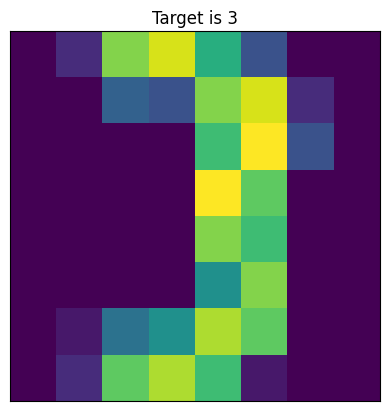

In [7]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(digits.data[ind].reshape(8,8))
plt.title(f'Target is {digits.target[ind]}')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

### Learning to Fit and Predict

- For now, we can think of the algorithm as a semi-perfect magical black box


In [8]:
# makes an object that is the classifier with specific hyperparameter
# this is the model that you are training
clf = svm.SVC(gamma=0.001, C=100)

- Here we choose some good parameters that might have to use gridsearch or cross-validation to determine these


### Fitting the data


In [9]:
# Fit the model using some data
# Includes all data except the last index
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

### Visualizing the Results


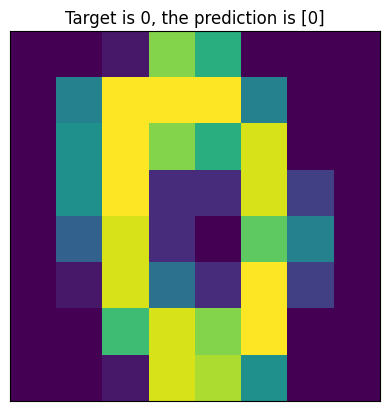

In [10]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(digits.data[ind].reshape(8,8))
plt.title(f'Target is {digits.target[ind]}, the prediction is {clf.predict(digits.data[ind].reshape(1,-1))}')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

### Saving a model


- Once trained it is possible to save a model to a file using `pickle`


#### Saves the Model

Saves the model object as a pickle


In [11]:
# saves the model 
s = pickle.dumps(clf)


#### Loads the Saved Model


In [12]:

# loads the model
clf2 = pickle.loads(s)


#### Tests the Loaded Model


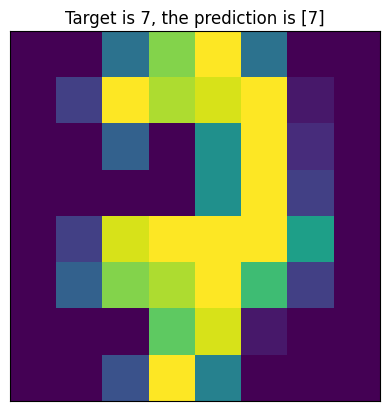

In [13]:

# test the model
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(digits.data[ind].reshape(8,8))
plt.title(f'Target is {digits.target[ind]}, the prediction is {clf2.predict(digits.data[ind].reshape(1,-1))}')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)